### Student Performace Indicator:

#### Problem Statement:
- This project understand how the student's performance (test scores) is affected by other variable such as Gender, Ethnicity, Parental level of education, lunch and Test preparation course.

#### Data: From kaggle.
- The data consists of 8 columns and 1000rows.

In [84]:
#importing my necessary library.....
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
#data
df = pd.read_csv('data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [86]:
df.shape

(1000, 8)

In [87]:
#missing value:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [88]:
#chekc duplicate:
df.duplicated().sum()

np.int64(0)

In [89]:
#check datatypes and null:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [90]:
#checking number of unique values of each columns:
df.nunique()


gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [91]:
#check describe of dataset:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insights till now:
- all means are very close to each other - between 66 and 68.05
- all sd are also close -between 14.6 and 15.19
- there is a minimum score 0 for maths, for writing minimum is much higher=10 and for reading my higher =17

#### Exploreing data:

In [92]:
print('Categories in gender variable: ', end=" ")
print(df['gender'].unique())
print('')

print('Categories in race/ethnicity variable:', end=" ")
print(df['race/ethnicity'].unique())
print('')

print('Categories in parental level of education variable:', end=" ")
print(df['parental level of education'].unique())
print('')

print('Categories in lunch variable:', end=" ")
print(df['lunch'].unique())
print('')

print('Categories in test preparaton course variable', end=" ")
print(df['test preparation course'].unique())

Categories in gender variable:  ['female' 'male']

Categories in race/ethnicity variable: ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in parental level of education variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in lunch variable: ['standard' 'free/reduced']

Categories in test preparaton course variable ['none' 'completed']


In [93]:
#define numerical and categorical features:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('we have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('\nwe have {} categorical features: {}'.format(len(categorical_features),categorical_features))

we have 3 numerical features: ['math score', 'reading score', 'writing score']

we have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


#### Total Scores and Average:

In [94]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [95]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()



print(f'Number of students with full marks in Reading: {reading_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Maths: {math_full}')

Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14
Number of students with full marks in Maths: 7


In [96]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <=20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in maths: {math_less_20}')
print(f'Number of students with less than 20 marks in writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in maths: 4
Number of students with less than 20 marks in writing: 3
Number of students with less than 20 marks in Reading: 1


#### Insights:
   - From above value got students have performed the worst in Maths
   - Best performed in reding section....

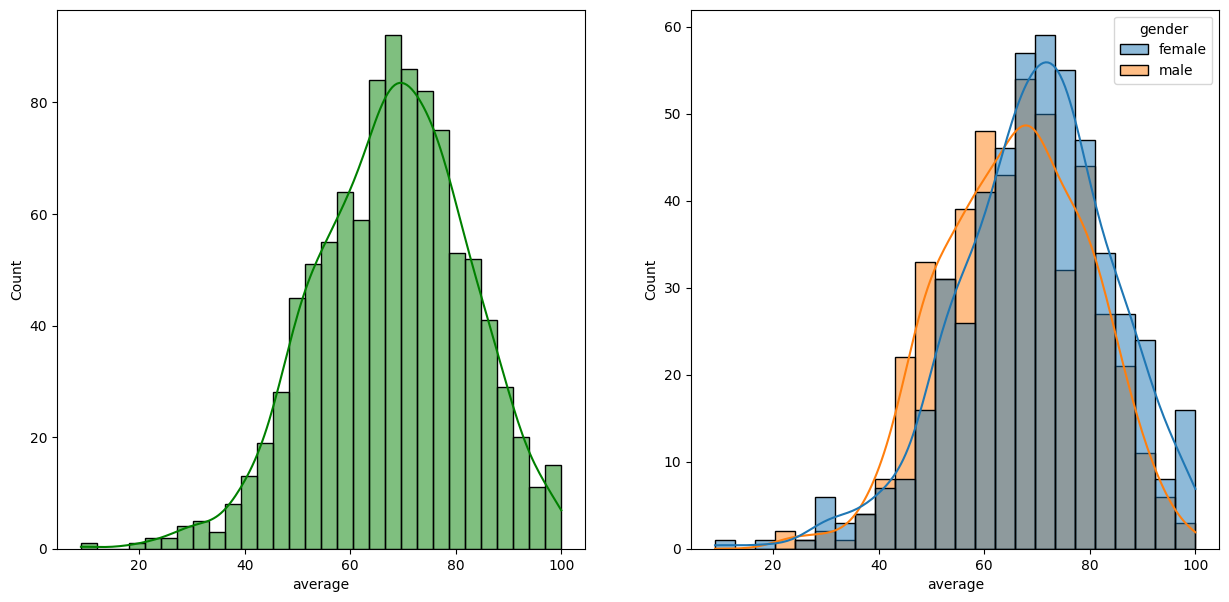

In [97]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

female students performed well than male students....

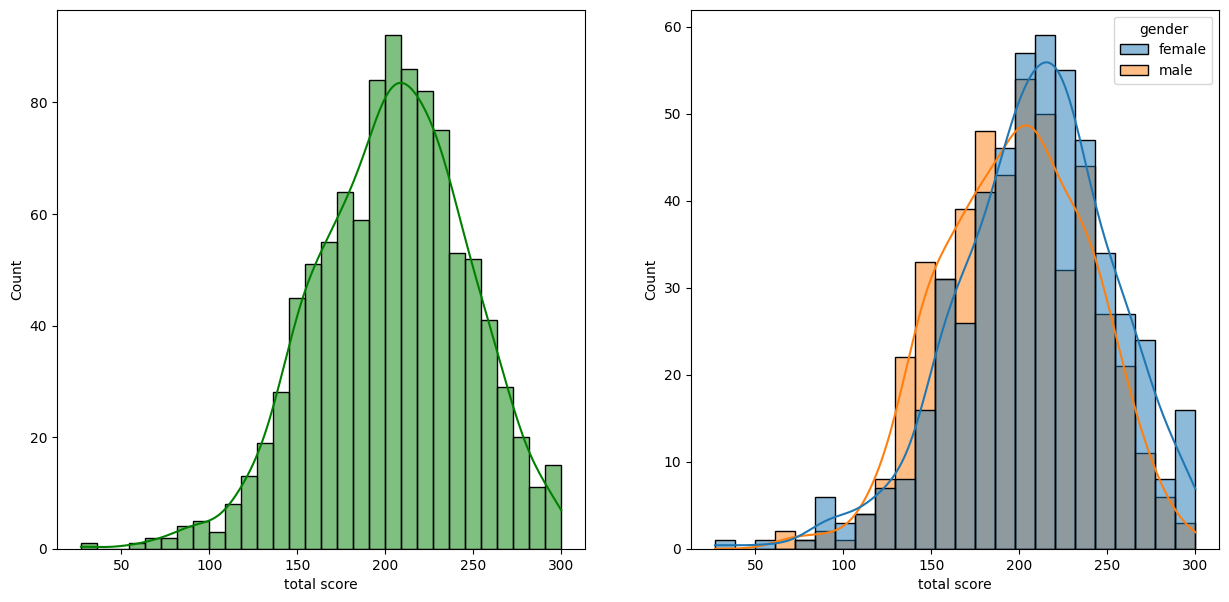

In [98]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='total score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True, hue='gender')
plt.show()

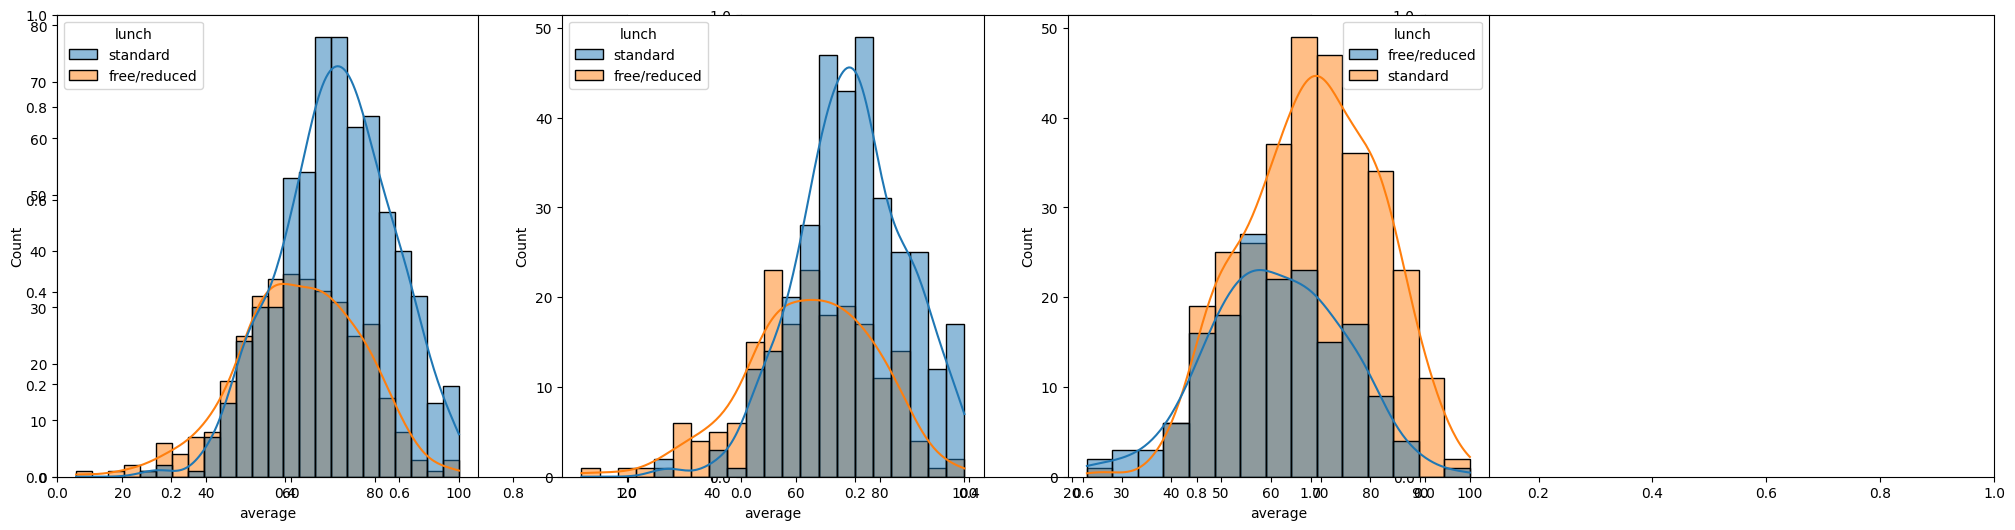

In [99]:
plt.subplots(1,3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')
plt.show()

standard lunch helps perform well inexam be it a male or female

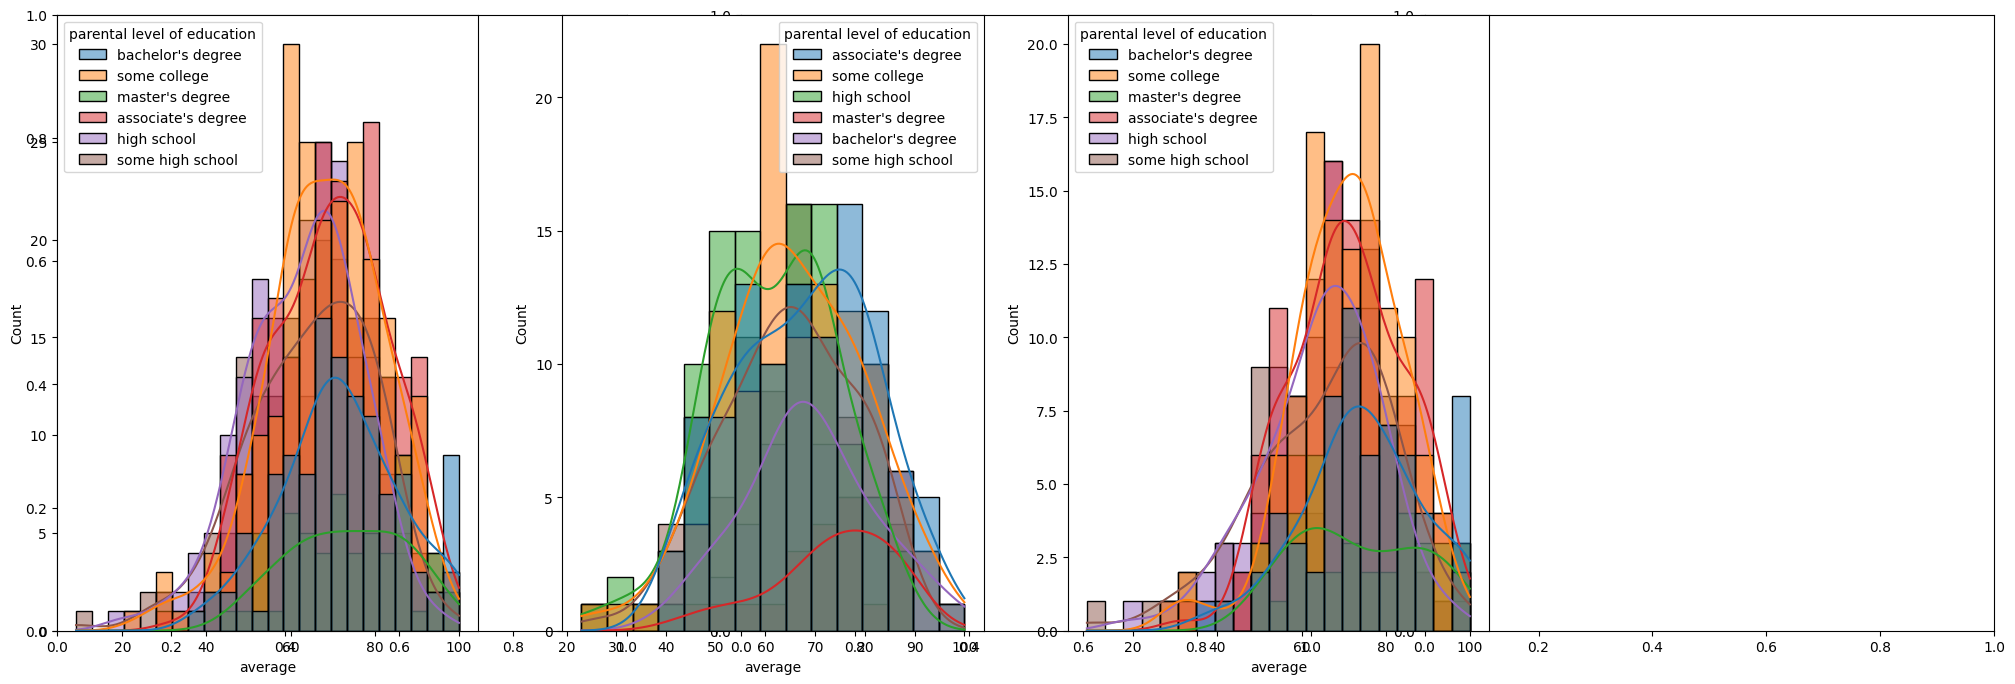

In [100]:
plt.subplots(1,3,figsize=(25,8))
plt.subplot(141)
ax = sns.histplot(data=df, x='average', kde=True, hue='parental level of education')
plt.subplot(142)
ax = sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental level of education')
plt.subplot(143)
ax = sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental level of education')
plt.show()

- In general parent's eduction don't help student perform well in exam
- 2nd plot shows that parent's whose eduction is of associate's degree or master's degree their male children exam 
- 3rd plot: we can see there is no  effect of parent's education on female students.

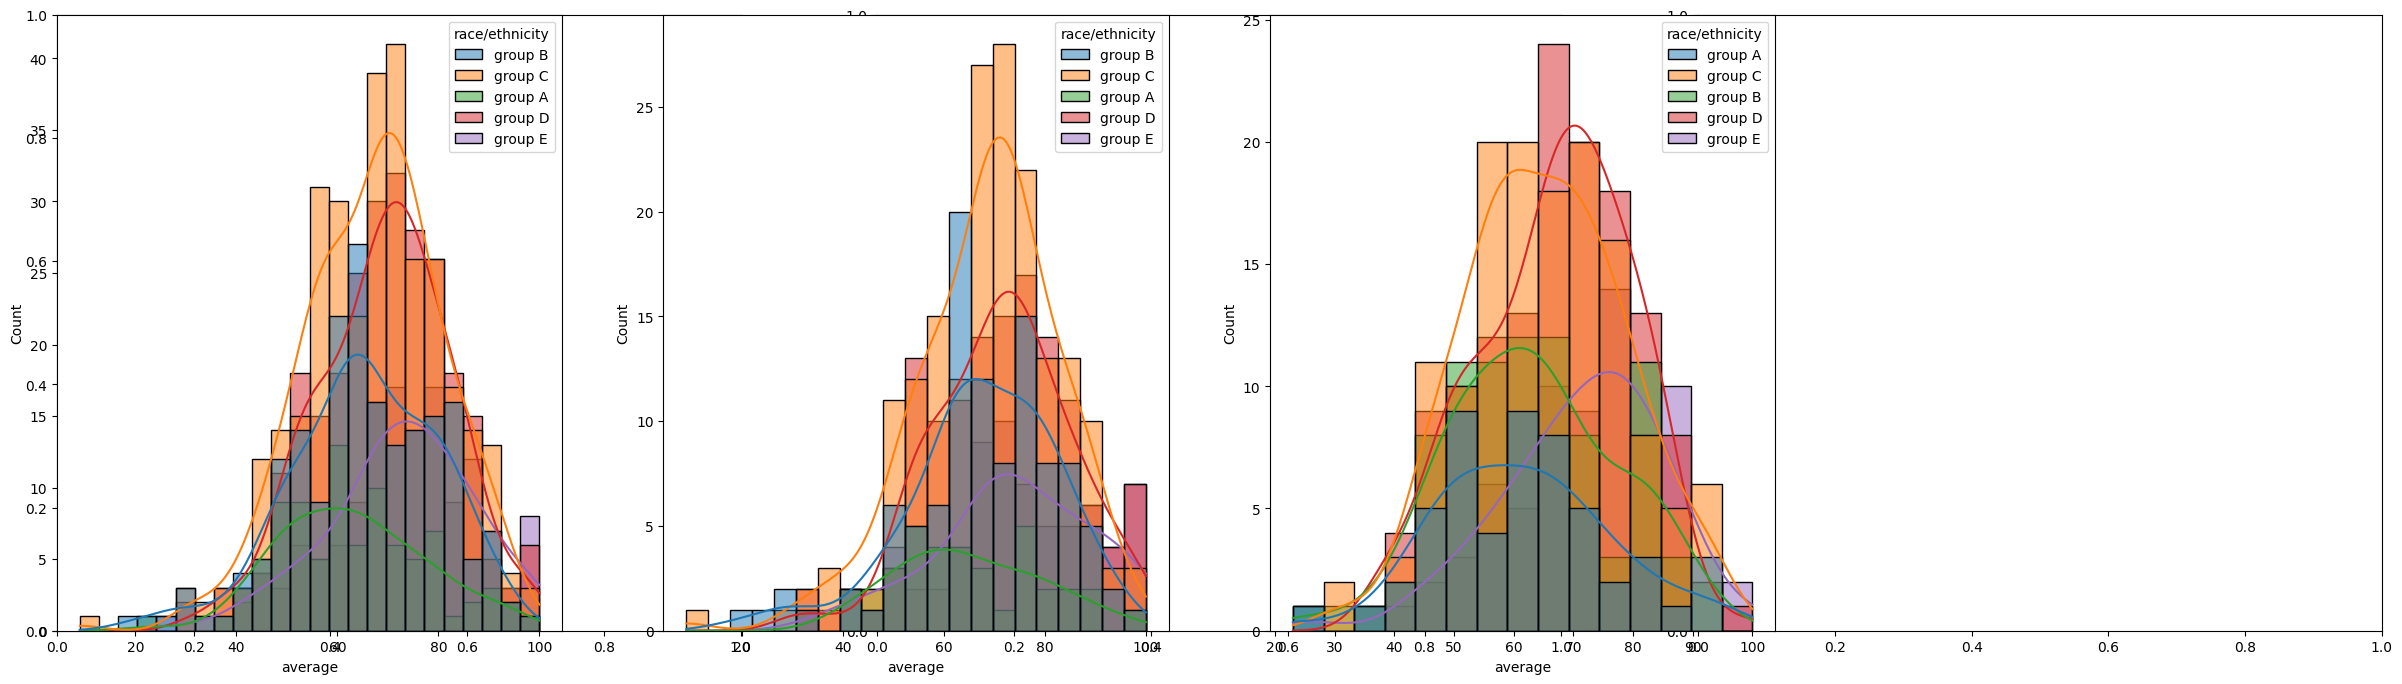

In [101]:
plt.subplots(1, 3, figsize=(30, 8))
plt.subplot(141)
ax = sns.histplot(data=df, x='average', kde=True, hue='race/ethnicity')
plt.subplot(142)
ax = sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='race/ethnicity')
plt.subplot(143)
ax = sns.histplot(data=df[df.gender=='male'], x = 'average', kde=True, hue='race/ethnicity')
plt.show()

- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female.

#### Maximum score of students in all three subjects:

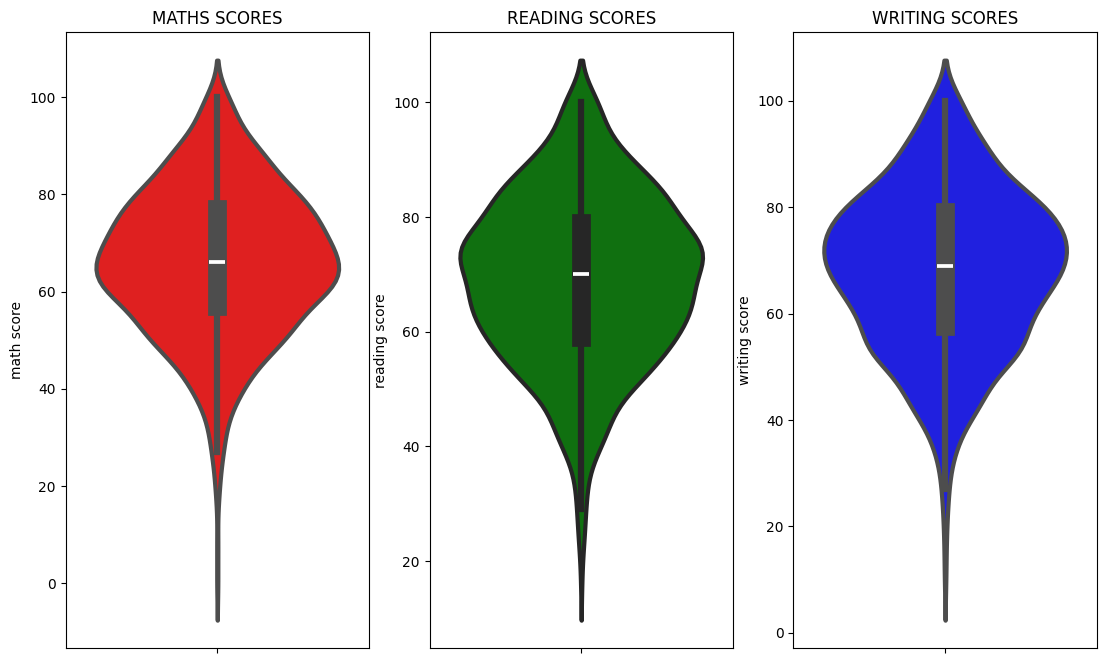

In [102]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 4, 1)
plt.title('MATHS SCORES')
sns.violinplot(y='math score', data=df, color='red', linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORES')

sns.violinplot(y='reading score', data=df, color='green', linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score', data=df, color='blue', linewidth=3)
plt.show()

From the above three violine plots it's clearly visible that most of the students score in between 60-80 in Maths whereas in readin and writing most of the score from 50 - 80.

#### Multivariate analysis using pieplot:

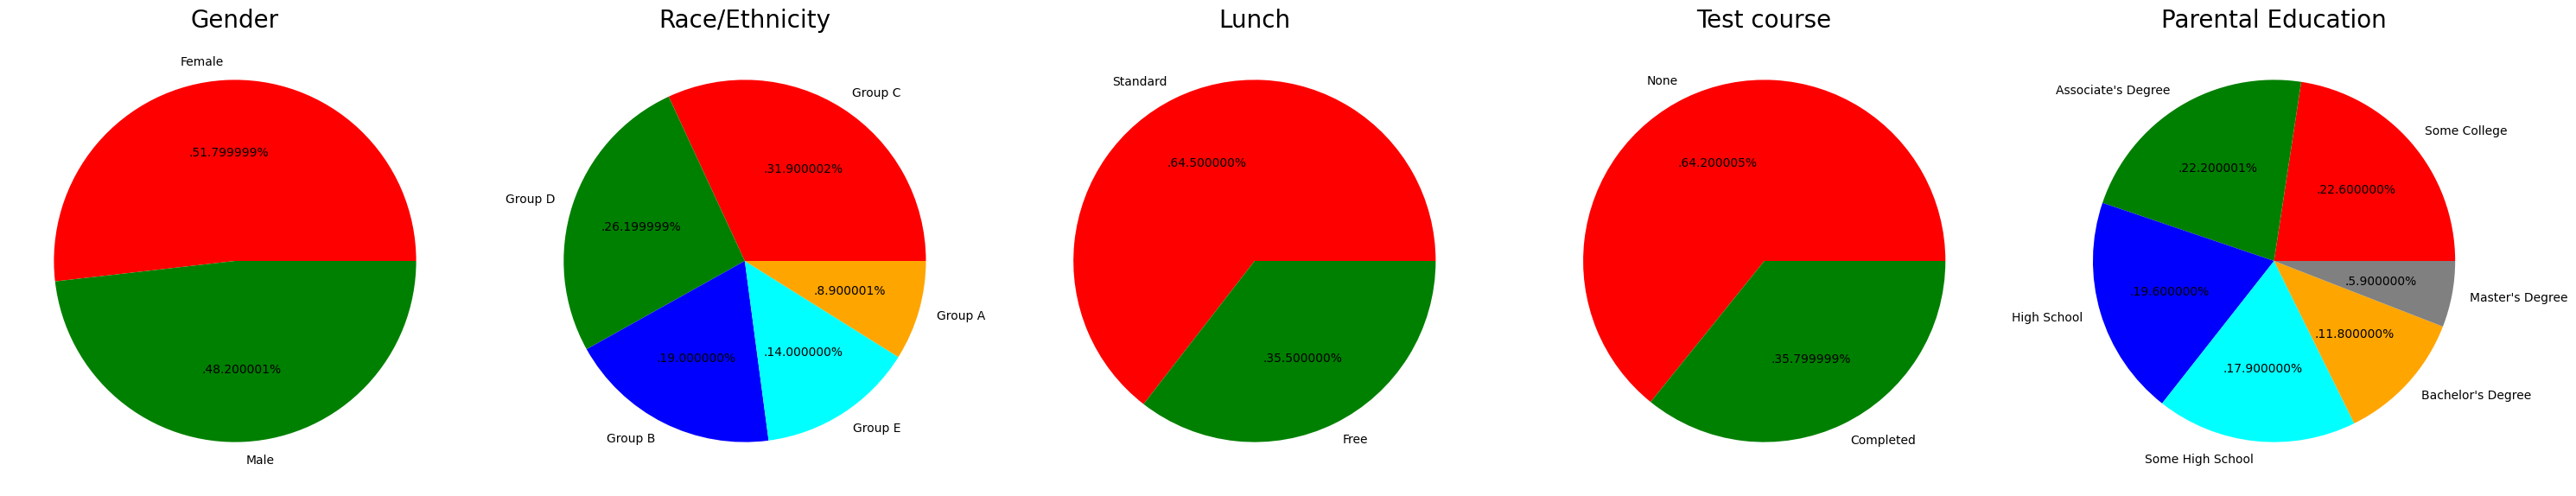

In [103]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size= df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1,5, 2)
size  = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']

plt.pie(size, colors= color, labels = labels, autopct = '.%2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']

plt.pie(size, colors= color, labels = labels, autopct = '.%2f%%')
plt.title('Test course', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']


plt.pie(size, colors = color, labels=labels, autopct='.%2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

- Number of Male and Female students is almos equal
- Number students are greater in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is 'Some college' is greater followed closely by "Associate's Degreee"

#### Feature Wise Visualization:

##### HOw is distribution of Gender?

C:\Users\Rajeev Kumar\AppData\Local\Temp\ipykernel_2692\1664485853.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0], saturation=0.95)


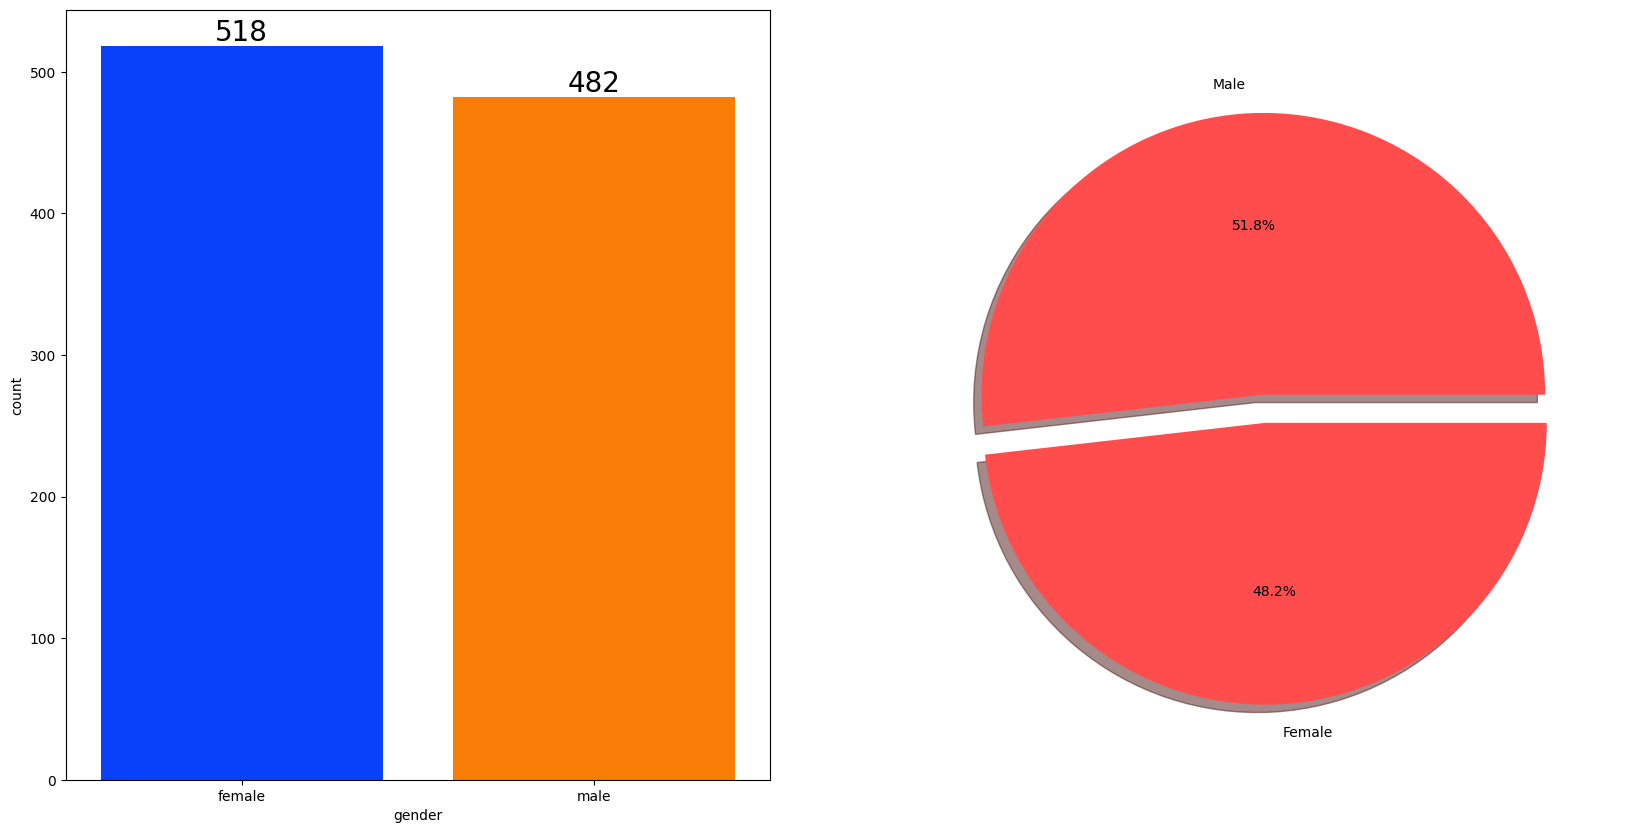

In [104]:
f, ax = plt.subplots(1,2, figsize=(20, 10))
sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
    
plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors=['#ff4d4d'])
plt.show()

Gender has balanced data with female students are 518 (48%) and male students are 482(52%)

#### How is Group wise distribution?

C:\Users\Rajeev Kumar\AppData\Local\Temp\ipykernel_2692\256507432.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['race/ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95)


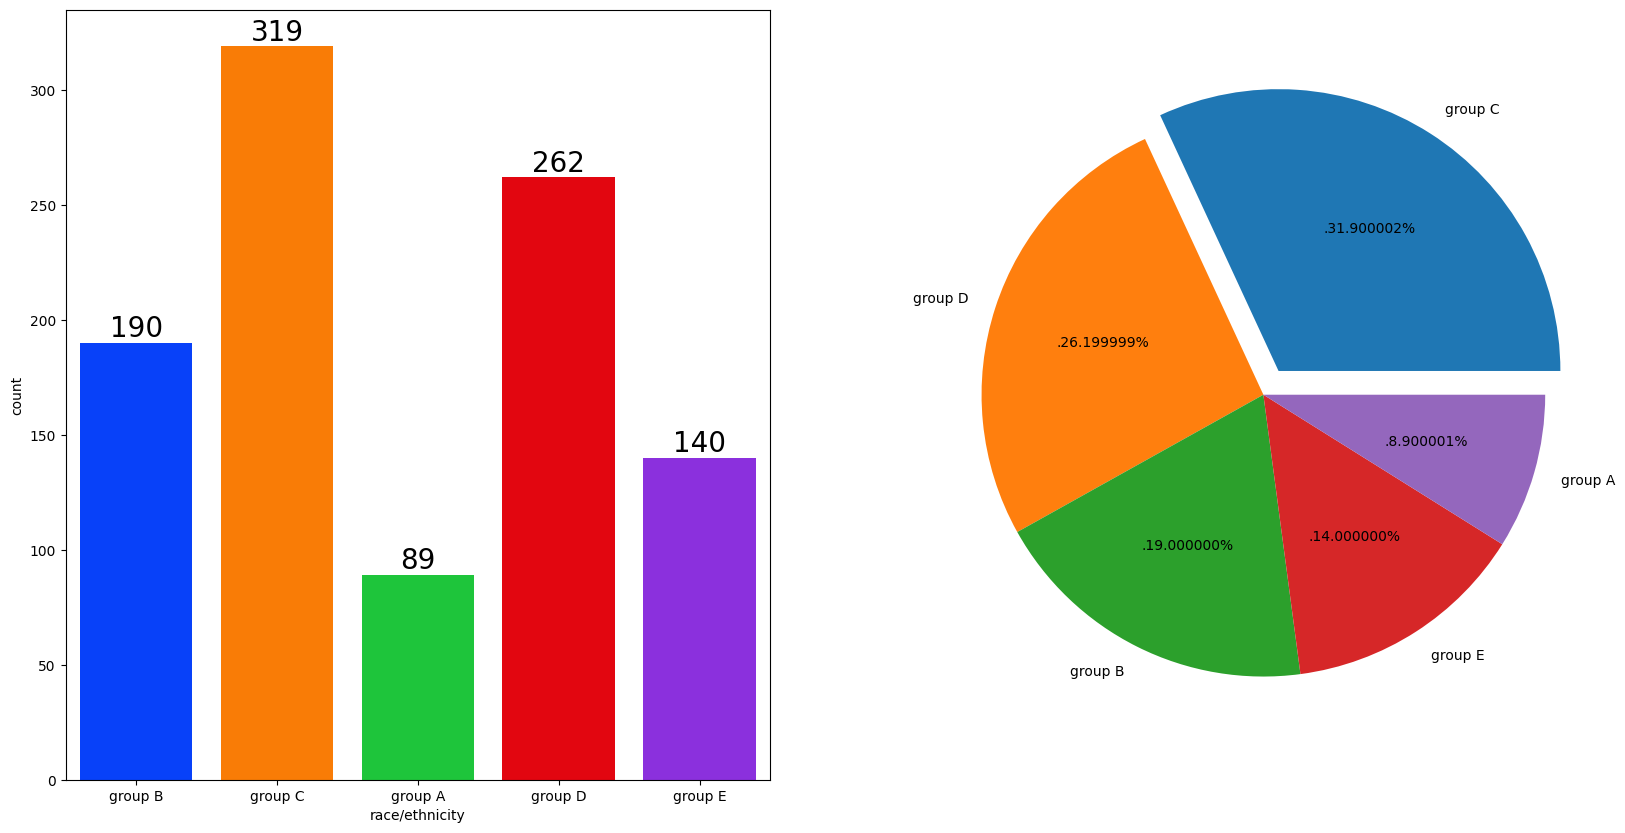

In [106]:
f, ax = plt.subplots(1,2, figsize=(20,10))
sns.countplot(x=df['race/ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
    
plt.pie(x=df['race/ethnicity'].value_counts(), labels=df['race/ethnicity'].value_counts().index, explode=[0.1, 0, 0, 0, 0], autopct='.%2f%%')
plt.show()

- Most of the student belonging from group C/ group D.
- Lowest number of students belong to group A.

#### Is Race/Ethenicity has any impact on student's performance?

C:\Users\Rajeev Kumar\AppData\Local\Temp\ipykernel_2692\2123860481.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2_mean['race/ethnicity'], y=Group_data2_mean['math score'], palette='mako', ax=ax[0])
C:\Users\Rajeev Kumar\AppData\Local\Temp\ipykernel_2692\2123860481.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2_mean['race/ethnicity'], y=Group_data2_mean['reading score'], palette='flare', ax=ax[1])
C:\Users\Rajeev Kumar\AppData\Local\Temp\ipykernel_2692\2123860481.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  

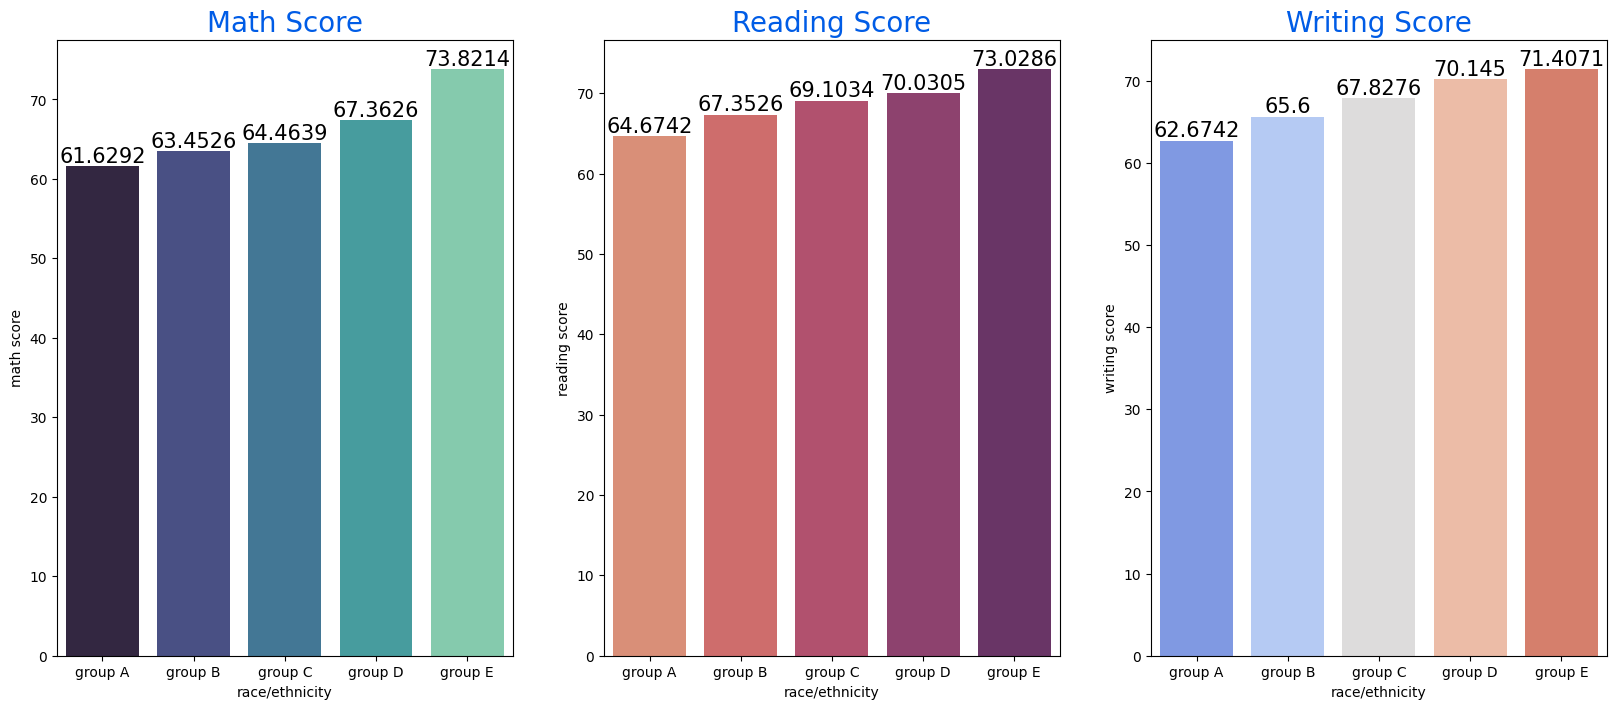

In [ ]:
#Group by race/ethnicity and calculate mean scores
Group_data2_mean = df.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean().reset_index()

f, ax = plt.subplots(1, 3, figsize=(20, 8))

sns.barplot(x=Group_data2_mean['race/ethnicity'], y=Group_data2_mean['math score'], palette='mako', ax=ax[0])
ax[0].set_title('Math Score', color='#005ce6', size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

sns.barplot(x=Group_data2_mean['race/ethnicity'], y=Group_data2_mean['reading score'], palette='flare', ax=ax[1])
ax[1].set_title('Reading Score', color='#005ce6', size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

sns.barplot(x=Group_data2_mean['race/ethnicity'], y=Group_data2_mean['writing score'], palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing Score', color='#005ce6', size=20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

plt.show()


- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects.

#### Wha is education background of Student's parent?

C:\Users\Rajeev Kumar\AppData\Local\Temp\ipykernel_2692\2133741367.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['parental level of education'], palette='Blues')


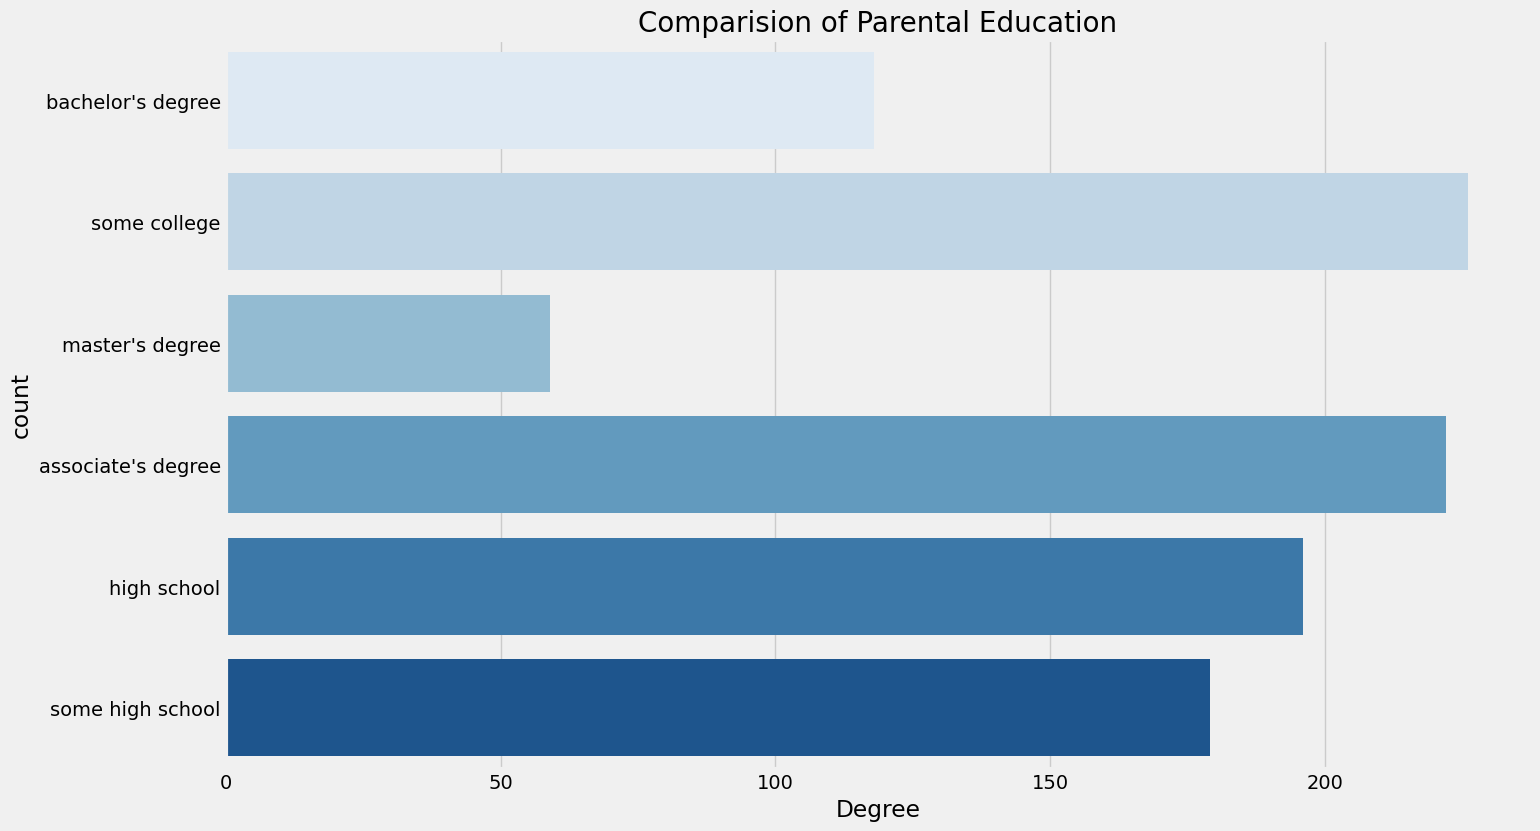

In [112]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette='Blues')
plt.title('Comparision of Parental Education', fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

- Largest number of parents are from some college


#### Is parental education has any impact on student's performance?

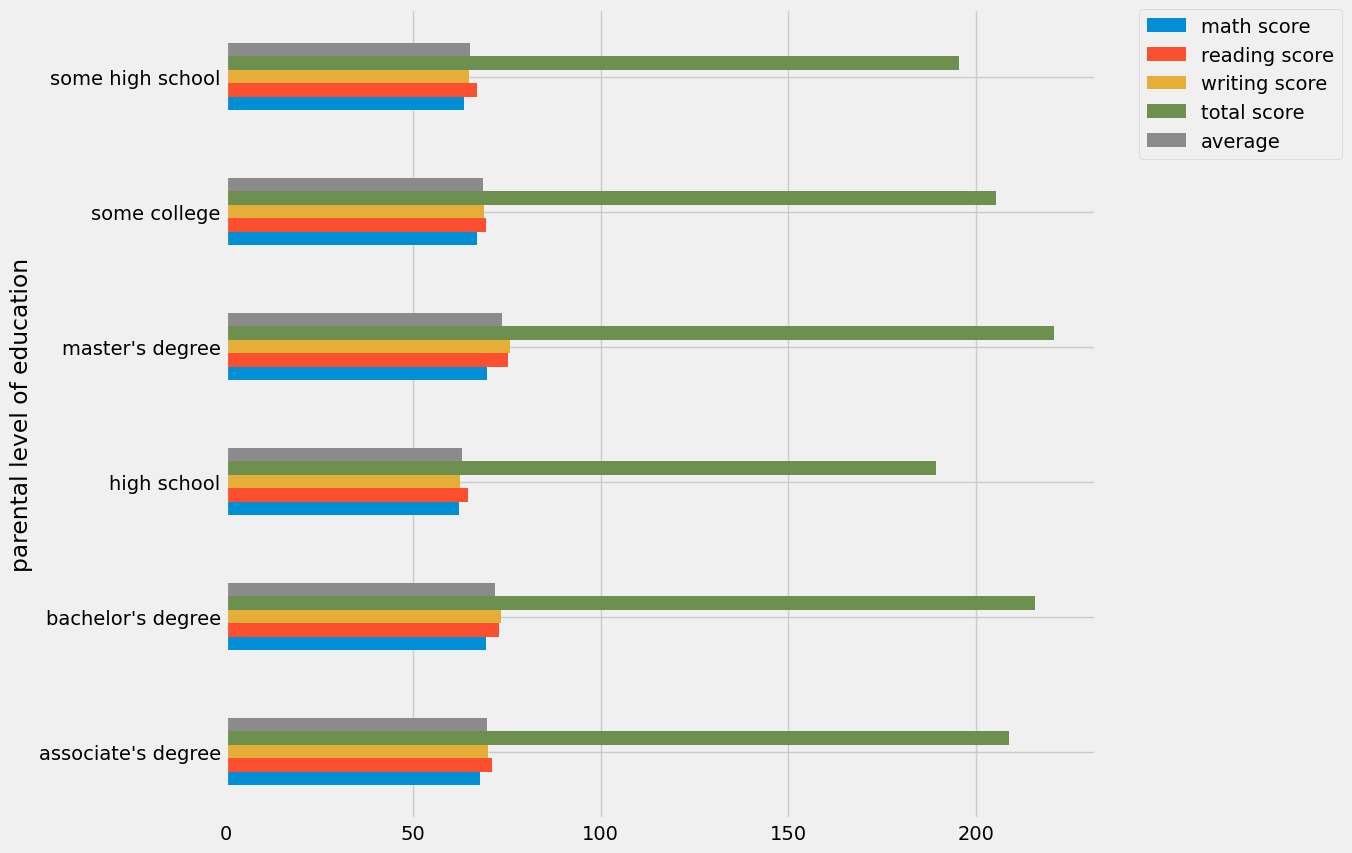

In [120]:
numeric_cols = df.select_dtypes(include=['number'])
numeric_cols.groupby(df['parental level of education']).mean().plot(
    kind='barh', figsize=(10, 10)
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()


The score of student whose parents posses master and bachelor level education are higher than other.

#### Is Test preparation course has any impact on student's performance?

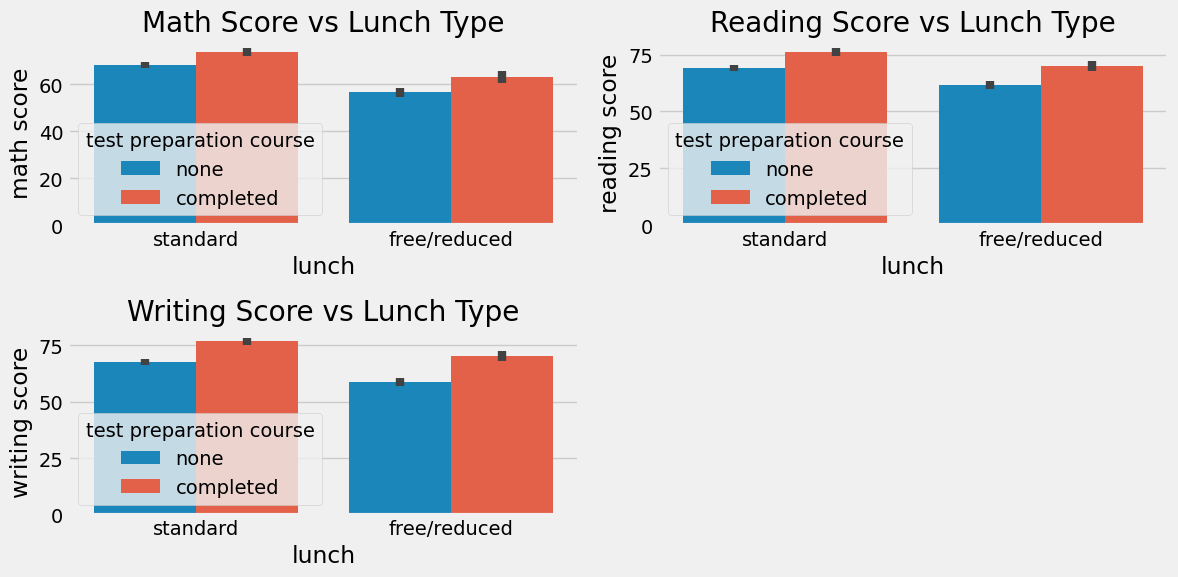

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.barplot(x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.title('Math Score vs Lunch Type')

plt.subplot(2, 2, 2)
sns.barplot(x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.title('Reading Score vs Lunch Type')

plt.subplot(2, 2, 3)
sns.barplot(x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])
plt.title('Writing Score vs Lunch Type')
plt.tight_layout()
plt.show()

studentw who have completed the test preparation course have scores higher in all three categories than who have'nt taken the course.

### Checking outliers:

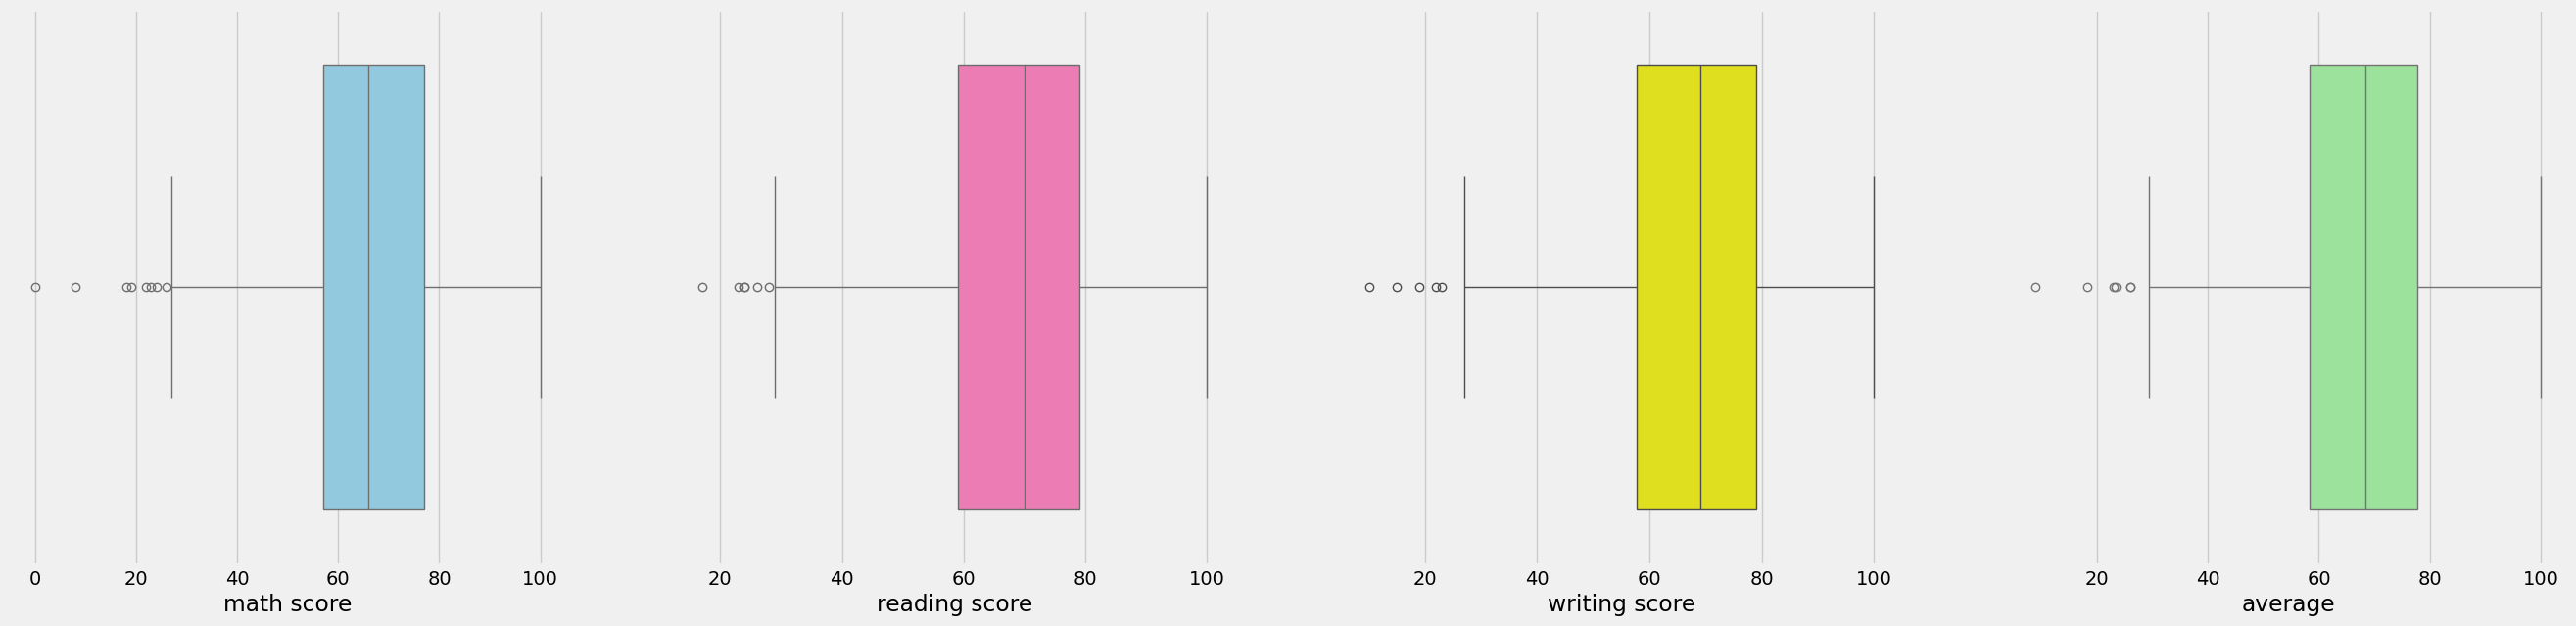

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(30, 7))

sns.boxplot(x=df['math score'], color='skyblue', ax=axes[0])
sns.boxplot(x=df['reading score'], color='hotpink', ax=axes[1])
sns.boxplot(x=df['writing score'], color='yellow', ax=axes[2])
sns.boxplot(x=df['average'], color='lightgreen', ax=axes[3])
plt.show()


### Multivariate analysis using pairplot:

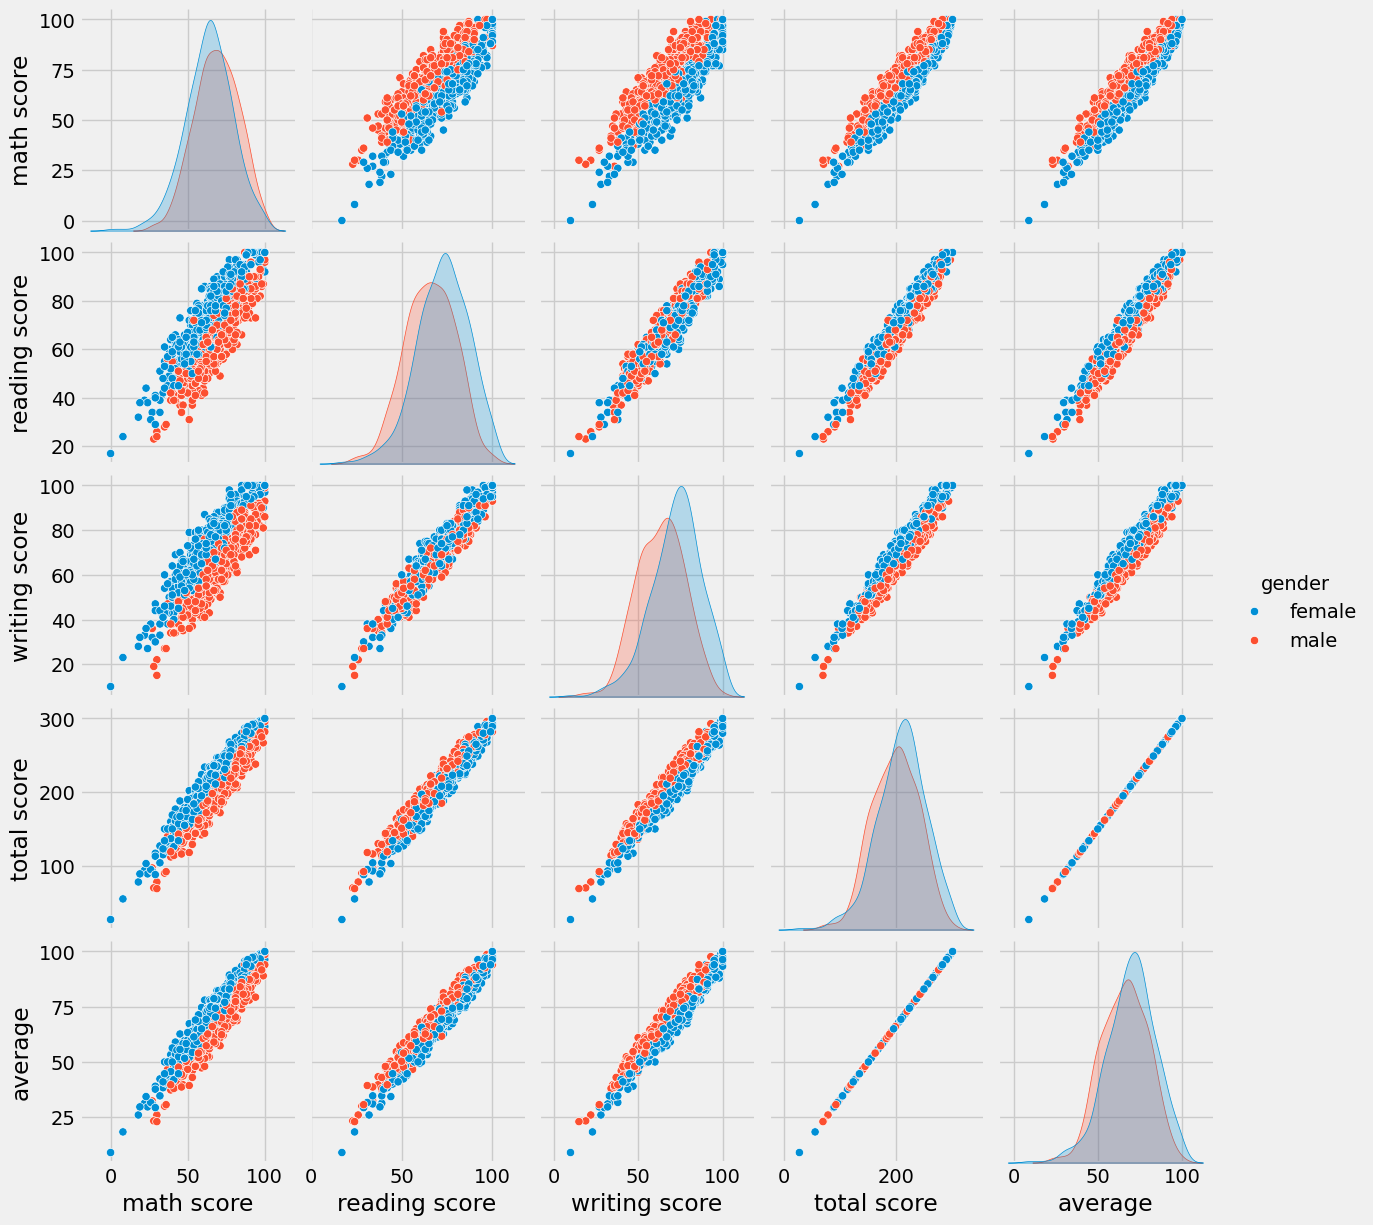

In [132]:
sns.pairplot(df, hue='gender')
plt.show()

from the above plot it is clear that all the scores increase linearly with each other....

### Conclusion:

- Student's performance is related with lunch, race, parental level education
- Female lead in pass percentage and also top scorers
- Student's performance is not much related with test preparation course
- Finishing preparation course is beneficial for students..